In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:28<00:00, 40.2MB/s]
100% 1.06G/1.06G [00:28<00:00, 40.5MB/s]


In [3]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall ('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [5]:
# go tot train model and customize the data
#generators: divide the data into batcjes so that  th e dta cn be used in small amounts respectively
train_ds=keras.utils.image_dataset_from_directory(
    #give path
    directory='/content/train',
   # tags=0 doc =1 will be assigned

    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds=keras.utils.image_dataset_from_directory(
    #give path
    directory='/content/test',
   # tags=0 doc =1 will be assigned
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
#normalize
def process(image,label):
  image=tf.cast(image/255.,tf.float32)
  return image,label

train_ds=train_ds.map(process)
#works like mapping recursion function

validation_ds=validation_ds.map(process)


In [7]:
#prepare a CNN model
#we are creating 3 filters 32 64 and 128
model=Sequential()
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [9]:
#n deep learning, Adam stands for "Adaptive Moment Estimation," and it's an optimization algorithm used for training neural networks.
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 77s 108ms/step - loss: 1.3462 - accuracy: 0.5942 - val_loss: 0.6441 - val_accuracy: 0.6360
Epoch 2/10
625/625 [==============================] - 82s 130ms/step - loss: 0.5597 - accuracy: 0.7193 - val_loss: 0.5443 - val_accuracy: 0.7224
Epoch 3/10
625/625 [==============================] - 69s 110ms/step - loss: 0.4808 - accuracy: 0.7742 - val_loss: 0.4547 - val_accuracy: 0.7996
Epoch 4/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4218 - accuracy: 0.8099 - val_loss: 0.4463 - val_accuracy: 0.7914
Epoch 5/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3521 - accuracy: 0.8468 - val_loss: 0.4104 - val_accuracy: 0.8126
Epoch 6/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3020 - accuracy: 0.8726 - val_loss: 1.2656 - val_accuracy: 0.5898
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2399 - accuracy: 0.9010 - val_loss: 0.4861 - val_ac

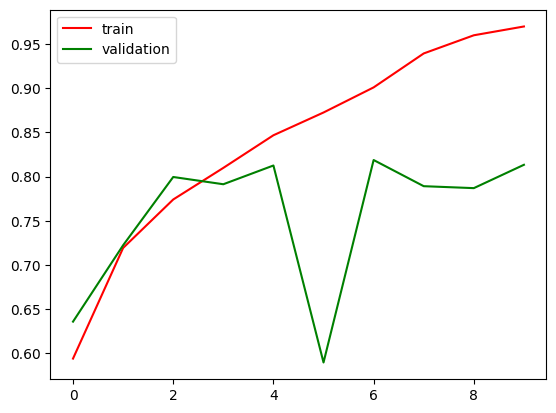

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label="train")
plt.plot(history.history['val_accuracy'],color='green',label="validation")
plt.legend()
plt.show()


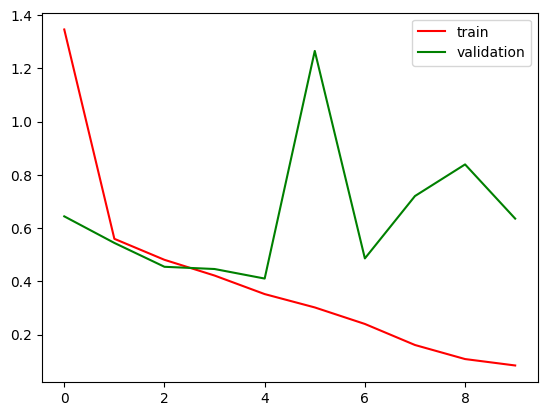

In [16]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='green',label='validation')
plt.legend()
plt.show()

In [17]:
# ways to reduce overfitting

# Add more data
# Data Augmentation
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [63]:
import cv2

In [64]:
test_img = cv2.imread('/content/images.jpg')

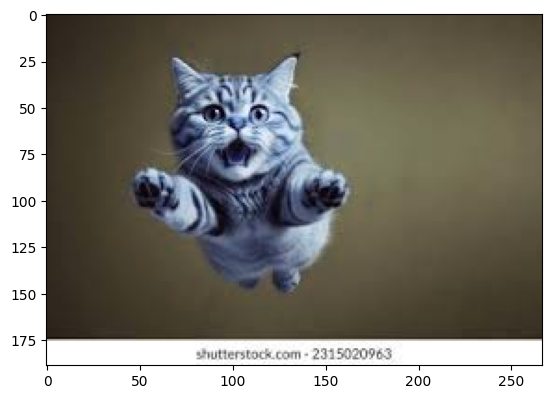

In [65]:
plt.imshow(test_img)

In [66]:
test_img.shape

(189, 267, 3)

In [67]:
test_img = cv2.resize(test_img,(256,256))

In [68]:
test_input = test_img.reshape((1,256,256,3))

In [69]:
model.predict(test_input)

1/1 [==============================] - 0s 25ms/step


array([[0.]], dtype=float32)